In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../h1b_kaggle.csv')

In [3]:
#Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:
df = reduce_mem_usage(df)
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN",-83.7500,42.28125
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS",-96.6875,33.03125
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY",-74.0625,40.71875
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO",-105.0000,39.75000
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI",-90.1875,38.62500


# 2. Feature Engineering 

In [5]:
df.drop(['Unnamed: 0','lon','lat'],axis=1,inplace=True)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI"


# 1) label encoding Case status

In [6]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [7]:
# CASE_STATUS AND FULL_TIME_POSITION
# We remove withdrawn and certified withdrawn as they happend due to human behaviour

df = df.drop(df[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)
df = df.drop(df[df['CASE_STATUS']=='WITHDRAWN'].index)

df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 1,'DENIED' : 0, 'REJECTED' : 0, 'INVALIDATED' : 0})
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1.0,187200.0,2016.0,"SANTA CLARA, CALIFORNIA"
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1.0,241842.0,2016.0,"ALEXANDRIA, VIRGINIA"
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1.0,99986.0,2016.0,"SAN DIEGO, CALIFORNIA"
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1.0,99986.0,2016.0,"CHULA VISTA, CALIFORNIA"
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1.0,187200.0,2016.0,"SANTA CLARA, CALIFORNIA"


# 2) label encoding Wage and State

In [8]:
def state_extractor(work_site):
    return work_site.split(', ')[1]
# or df['STATE'] = df['WORKSITE'].map(lambda x: x.split(', ')[1])


def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [9]:
# WAGE
df['WAGE_CATEGORY'] = df['PREVAILING_WAGE'].apply(wage_categorization)
df = df.drop(['PREVAILING_WAGE'], axis = 1)

# State extractor
df['STATE'] = df['WORKSITE'].apply(state_extractor)
df = df.drop(['WORKSITE'],axis=1)
df.head()

df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WAGE_CATEGORY,STATE
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1.0,2016.0,VERY HIGH,VIRGINIA
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1.0,2016.0,HIGH,CALIFORNIA
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1.0,2016.0,HIGH,CALIFORNIA
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA


<br><br><br><br>
# 3) Checking the acceptance ratio

In [10]:
# Calculating the acceptance ratio
def categorisation(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"     # no data
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"     # very low acceptance
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"    # low acceptance
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"   # medium acceptance
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA" # high acceptance
    elif ratio_of_acceptance>=0.80:
        return "VHA" # very high accpetance

#  calculation of acceptance ratio
df_1 = df.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
df_1s = df.loc[:,['SOC_NAME', 'CASE_STATUS']]
df_1j = df.loc[:,['JOB_TITLE', 'CASE_STATUS']]

df_2_C = df_1[df_1.CASE_STATUS == 1].EMPLOYER_NAME
df_2_Cs = df_1s[df_1s.CASE_STATUS == 1].SOC_NAME
df_2_Cj = df_1j[df_1j.CASE_STATUS == 1].JOB_TITLE

positive_counts = df_2_C.value_counts()
positive_counts_s = df_2_Cs.value_counts()
positive_counts_j = df_2_Cj.value_counts()

total_counts = df_1.EMPLOYER_NAME.value_counts()
total_counts_s = df_1s.SOC_NAME.value_counts()
total_counts_j = df_1j.JOB_TITLE.value_counts()

final_ratio_series = positive_counts / total_counts
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_j = positive_counts_j / total_counts_j

### Creating a temp dataset to get the top 10 companies and store the value

In [11]:
# intialising temp file
temp = pd.read_csv('../h1b_kaggle.csv')

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation)
temp['EMPLOYER_ACCEPTANCE'] = temp.EMPLOYER_NAME.map(final_classification_employer)

final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation)
temp['SOC_ACCEPTANCE'] = temp.SOC_NAME.map(final_classification_soc)

final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation)
temp['JOB_ACCEPTANCE'] = temp.JOB_TITLE.map(final_classification_job)

# CASE_STATUS AND FULL_TIME_POSITION
# We remove withdrawn and certified withdrawn as they happend due to human behaviour

temp = temp.drop(temp[temp['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)
temp = temp.drop(temp[temp['CASE_STATUS']=='WITHDRAWN'].index)

temp['CASE_STATUS'] = temp['CASE_STATUS'].map({'CERTIFIED' : 1,'DENIED' : 0, 'REJECTED' : 0, 'INVALIDATED' : 0})
temp['FULL_TIME_POSITION'] = temp['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
temp.head()

temp.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE
18,19,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1.0,187200.0,2016.0,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108,VHA,VHA,HA
19,20,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1.0,241842.0,2016.0,"ALEXANDRIA, VIRGINIA",-77.046921,38.804835,VHA,VHA,VHA
22,23,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1.0,99986.0,2016.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738,VHA,VHA,HA
23,24,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1.0,99986.0,2016.0,"CHULA VISTA, CALIFORNIA",-117.084196,32.640054,VHA,VHA,VHA
25,26,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1.0,187200.0,2016.0,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108,VHA,VHA,HA


In [12]:
# one hot coding the ratios so we could find out which company has highest ratio
temp = pd.get_dummies(temp, columns=['EMPLOYER_ACCEPTANCE','JOB_ACCEPTANCE', 'SOC_ACCEPTANCE'], drop_first=True)

temp.drop(['FULL_TIME_POSITION','YEAR','WORKSITE','PREVAILING_WAGE','lon','lat','Unnamed: 0'],axis=1,inplace=True)

temp.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [13]:
acceptance_corr = temp.corr().iloc[:,0]

###  finding the top 10 companies in each field

In [14]:
# for creating temp matrixes
# for EMPLOYER_ACCEPTANCE
temp_1_1 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_HA']]
temp_1_2 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_LA']]
temp_1_3 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_MA']]
temp_1_4 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_VHA']]
temp_1_5 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_VLA']]
# for JOB_ACCEPTANCE
temp_2_1 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_HA']]
temp_2_2 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_LA']]
temp_2_3 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_MA']]
temp_2_4 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_VHA']]
temp_2_5 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_VLA']]
# for SOC_ACCEPTANCE
temp_3_1 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_HA']]
temp_3_2 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_LA']]
temp_3_3 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_MA']]
temp_3_4 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_VHA']]
temp_3_5 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_VLA']]


# listing all the 
# for EMPLOYER_ACCEPTANCE
temp__1_1 = temp_1_1[temp_1_1.EMPLOYER_ACCEPTANCE_HA == 1].EMPLOYER_NAME
temp__1_2 = temp_1_2[temp_1_2.EMPLOYER_ACCEPTANCE_LA == 1].EMPLOYER_NAME
temp__1_3 = temp_1_3[temp_1_3.EMPLOYER_ACCEPTANCE_MA == 1].EMPLOYER_NAME
temp__1_4 = temp_1_4[temp_1_4.EMPLOYER_ACCEPTANCE_VHA == 1].EMPLOYER_NAME
temp__1_5 = temp_1_5[temp_1_5.EMPLOYER_ACCEPTANCE_VLA == 1].EMPLOYER_NAME
# for JOB_ACCEPTANCE
temp__2_1 = temp_2_1[temp_2_1.JOB_ACCEPTANCE_HA == 1].JOB_TITLE
temp__2_2 = temp_2_2[temp_2_2.JOB_ACCEPTANCE_LA == 1].JOB_TITLE
temp__2_3 = temp_2_3[temp_2_3.JOB_ACCEPTANCE_MA == 1].JOB_TITLE
temp__2_4 = temp_2_4[temp_2_4.JOB_ACCEPTANCE_VHA == 1].JOB_TITLE
temp__2_5 = temp_2_5[temp_2_5.JOB_ACCEPTANCE_VLA == 1].JOB_TITLE
# for SOC_ACCEPTANCE
temp__3_1 = temp_3_1[temp_3_1.SOC_ACCEPTANCE_HA == 1].SOC_NAME
temp__3_2 = temp_3_2[temp_3_2.SOC_ACCEPTANCE_LA == 1].SOC_NAME
temp__3_3 = temp_3_3[temp_3_3.SOC_ACCEPTANCE_MA == 1].SOC_NAME
temp__3_4 = temp_3_4[temp_3_4.SOC_ACCEPTANCE_VHA == 1].SOC_NAME
temp__3_5 = temp_3_5[temp_3_5.SOC_ACCEPTANCE_VLA == 1].SOC_NAME




# for getting top 10 companies in each ratio

top_10_EMPLOYER_ACCEPTANCE_HA =  temp__1_1.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_LA =  temp__1_2.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_MA =  temp__1_3.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_VHA =  temp__1_4.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_VLA =  temp__1_5.value_counts()[:10]

top_10_JOB_ACCEPTANCE_HA =  temp__2_1.value_counts()[:10]
top_10_JOB_ACCEPTANCE_LA =  temp__2_2.value_counts()[:10]
top_10_JOB_ACCEPTANCE_MA =  temp__2_3.value_counts()[:10]
top_10_JOB_ACCEPTANCE_VHA =  temp__2_4.value_counts()[:10]
top_10_JOB_ACCEPTANCE_VLA =  temp__2_5.value_counts()[:10]

top_10_SOC_ACCEPTANCE_HA =  temp__3_1.value_counts()[:10]
top_10_SOC_ACCEPTANCE_LA =  temp__3_2.value_counts()[:10]
top_10_SOC_ACCEPTANCE_MA =  temp__3_3.value_counts()[:10]
top_10_SOC_ACCEPTANCE_VHA =  temp__3_4.value_counts()[:10]
top_10_SOC_ACCEPTANCE_VLA =  temp__3_5.value_counts()[:10]

# print(y1[0])
print(top_10_EMPLOYER_ACCEPTANCE_HA)

CONSULTADD INC                      432
ACCENZ LLC                          330
HOWARD UNIVERSITY                   153
DMC EDUCATION & RESEARCH            125
SOFT TECH SOURCE                    111
PIXAWARE TECHNOLOGIES, LLC          110
AXIS TECHNOLOGY SOLUTIONS INC       107
CORE TECH INTERNATIONAL             104
ADVISORY LLC                         85
HENNEPIN HEALTHCARE SYSTEM, INC.     85
Name: EMPLOYER_NAME, dtype: int64


# Creating a exel file while where we will store top companies name with thier acceptance ratio

In [15]:
# lol = top_10_EMPLOYER_ACCEPTANCE_HA
# lol = lol.to_frame()

# lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_HA'}, inplace=True)
# print(lol)

# lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_LA], axis=1)
# lol.rename(columns={'EMPLOYER_NAME': 'EMPLOYER_ACCEPTANCE_LA'}, inplace=True)
# lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_MA], axis=1)
# lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_MA'}, inplace=True)
# lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_VHA], axis=1)
# lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_VHA'}, inplace=True)
# lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_VLA], axis=1)
# lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_VLA'}, inplace=True)
# print(lol)

# lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_HA], axis=1)
# lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_HA'}, inplace=True)
# lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_LA], axis=1)
# lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_LA'}, inplace=True)
# lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_MA], axis=1)
# lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_MA'}, inplace=True)
# lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_VHA], axis=1)
# lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_VHA'}, inplace=True)
# lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_VLA], axis=1)
# lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_VLA'}, inplace=True)

# lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_HA], axis=1)
# lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_HA'}, inplace=True)
# lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_LA], axis=1)
# lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_LA'}, inplace=True)
# lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_MA], axis=1)
# lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_MA'}, inplace=True)
# lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_VHA], axis=1)
# lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_VHA'}, inplace=True)
# lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_VLA], axis=1)
# lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_VLA'}, inplace=True)


# lol.head(10)

# # lol.to_excel (r'D:\codes\college\pbl\trying\model\Top_10_companies_ratio.xlsx', index = True, header=True)



In [16]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WAGE_CATEGORY,STATE
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1.0,2016.0,VERY HIGH,VIRGINIA
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1.0,2016.0,HIGH,CALIFORNIA
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1.0,2016.0,HIGH,CALIFORNIA
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA


# trying something

In [17]:
print(top_10_EMPLOYER_ACCEPTANCE_HA.keys())

Index(['CONSULTADD INC', 'ACCENZ LLC', 'HOWARD UNIVERSITY',
       'DMC EDUCATION & RESEARCH', 'SOFT TECH SOURCE',
       'PIXAWARE TECHNOLOGIES, LLC', 'AXIS TECHNOLOGY SOLUTIONS INC',
       'CORE TECH INTERNATIONAL', 'ADVISORY LLC',
       'HENNEPIN HEALTHCARE SYSTEM, INC.'],
      dtype='object')


In [18]:
for i in top_10_EMPLOYER_ACCEPTANCE_HA.keys():
    print(i)

CONSULTADD INC
ACCENZ LLC
HOWARD UNIVERSITY
DMC EDUCATION & RESEARCH
SOFT TECH SOURCE
PIXAWARE TECHNOLOGIES, LLC
AXIS TECHNOLOGY SOLUTIONS INC
CORE TECH INTERNATIONAL
ADVISORY LLC
HENNEPIN HEALTHCARE SYSTEM, INC.


In [19]:
df['EMPLOYER_ACCEPTANCE_HA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_HA.keys()]) ,1,0)
print(df['EMPLOYER_ACCEPTANCE_HA'].value_counts())

df[['EMPLOYER_NAME','EMPLOYER_ACCEPTANCE_HA']].head()

0    2708358
1       1642
Name: EMPLOYER_ACCEPTANCE_HA, dtype: int64


,EMPLOYER_NAME,EMPLOYER_ACCEPTANCE_HA
18,QUICKLOGIX LLC,0
19,"MCCHRYSTAL GROUP, LLC",0
22,"LOMICS, LLC",0
23,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,0
25,"QUICKLOGIX, INC.",0


# Creating a new feature to mark the companies intop 10  combined of each category based on thier acceptance ratio

In [20]:
df['EMPLOYER_ACCEPTANCE_HA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_HA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_LA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_LA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_MA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_MA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_VHA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_VHA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_VLA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_VLA.keys()]) ,1,0)

df['JOB_ACCEPTANCE_HA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_HA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_LA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_LA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_MA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_MA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_VHA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_VHA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_VLA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_VLA.keys()]) ,1,0)

df['SOC_ACCEPTANCE_HA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_HA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_LA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_LA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_MA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_MA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_VHA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_VHA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_VLA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_VLA.keys()]) ,1,0)

df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WAGE_CATEGORY,STATE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1.0,2016.0,VERY HIGH,VIRGINIA,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1.0,2016.0,HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1.0,2016.0,HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(df['EMPLOYER_ACCEPTANCE_HA'].value_counts())
df.dropna(axis=0, how="any",inplace=True)
df['EMPLOYER_ACCEPTANCE_HA']

0    2708358
1       1642
Name: EMPLOYER_ACCEPTANCE_HA, dtype: int64


18         0
19         0
22         0
23         0
25         0
          ..
3002369    0
3002378    0
3002383    0
3002389    0
3002392    0
Name: EMPLOYER_ACCEPTANCE_HA, Length: 2694005, dtype: int32

In [22]:
print(df['EMPLOYER_NAME'][df['EMPLOYER_ACCEPTANCE_HA'] == 1].nunique())
df['EMPLOYER_NAME'][df['EMPLOYER_ACCEPTANCE_HA'] == 1].unique()

10


array(['HOWARD UNIVERSITY', 'CONSULTADD INC',
       'HENNEPIN HEALTHCARE SYSTEM, INC.', 'ACCENZ LLC',
       'SOFT TECH SOURCE', 'CORE TECH INTERNATIONAL',
       'AXIS TECHNOLOGY SOLUTIONS INC', 'PIXAWARE TECHNOLOGIES, LLC',
       'DMC EDUCATION & RESEARCH', 'ADVISORY LLC'], dtype=object)

<br><br><br><br><br><br><br><br>
# label encoding SOC_NAme 

In [23]:
df['SOC_NAME'].value_counts().sort_values(ascending=False).head(50)

Computer Systems Analysts                             271365
Computer Programmers                                  205973
SOFTWARE DEVELOPERS, APPLICATIONS                     197933
COMPUTER SYSTEMS ANALYSTS                             197925
Software Developers, Applications                     174185
COMPUTER PROGRAMMERS                                  154596
COMPUTER OCCUPATIONS, ALL OTHER                        99765
Computer Occupations, All Other                        64891
Software Developers, Systems Software                  40543
Management Analysts                                    35875
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  35262
Financial Analysts                                     30072
Accountants and Auditors                               29111
Computer Software Engineers, Applications              28160
MANAGEMENT ANALYSTS                                    26220
Computer Occupations, All Other*                       24360
Mechanical Engineers    

In [24]:
import sys
import warnings
warnings.filterwarnings("ignore")

df['JOB'] = 'others'
df['JOB'][df['SOC_NAME'].str.contains('COMPUTER','SOFTWARE')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('WEB','NETWORK')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('DEVELOPERS','SYSTEM')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('CHIEF','MANAGMENT')] = 'Manager'
df['JOB'][df['SOC_NAME'].str.contains('MECHANICAL','ELECTRICAL')] = 'Engineer'
df['JOB'][df['SOC_NAME'].str.contains('CIVIL','ENGINEER')] = 'Engineer'
df['JOB'][df['SOC_NAME'].str.contains('DESIGN','GRAPHIC')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('UI','UX')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('DRAW','ART')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('ACCOUNTANT')] = 'Finance'
df['JOB'][df['SOC_NAME'].str.contains('DATABASE')] = 'Database'
df['JOB'][df['SOC_NAME'].str.contains('SALES','MARKET')] = 'Scm'
df['JOB'][df['SOC_NAME'].str.contains('FINANCIAL','FINANCE')] = 'Finance'
df['JOB'][df['SOC_NAME'].str.contains('PUBLIC','FUNDRASING')] = 'Pr'
df['JOB'][df['SOC_NAME'].str.contains('EDUCAION','LAW')] = 'Administrative'
df['JOB'][df['SOC_NAME'].str.contains('AUDITORS','COMPILANCE')] = 'Audit'
df['JOB'][df['SOC_NAME'].str.contains('DISTRIBUTION','LOGISTIC')] = 'Scm'
df['JOB'][df['SOC_NAME'].str.contains('RECRUITS','HUMAN')] = 'Hr'
df['JOB'][df['SOC_NAME'].str.contains('AGRICULTURE','FARM')] = 'Agri'
df['JOB'][df['SOC_NAME'].str.contains('CONSTRUCTION','ARCHITECTURAL')] = 'Estate'
df['JOB'][df['SOC_NAME'].str.contains('THERAPIST','SURGEONS')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('BIO','CHEMISTS')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('MEDICAL')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('FORENSIC','HEALTH')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('TEACHER','STATISTICIANS')] = 'Education'

df.head(50)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WAGE_CATEGORY,STATE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,...,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,JOB
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1.0,2016.0,VERY HIGH,VIRGINIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1.0,2016.0,HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1.0,2016.0,HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
27,1.0,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
28,1.0,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1.0,2016.0,VERY HIGH,TEXAS,0,0,...,0,0,0,0,0,0,0,0,0,Manager
29,1.0,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1.0,2016.0,HIGH,FLORIDA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
30,1.0,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1.0,2016.0,HIGH,DISTRICT OF COLUMBIA,0,0,...,0,0,0,0,0,0,0,0,0,Manager
31,1.0,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1.0,2016.0,VERY HIGH,ILLINOIS,0,0,...,0,0,0,0,0,0,0,0,0,Manager


In [25]:
print(df['JOB'].unique())
print(df['JOB'].value_counts())

['Manager' 'others' 'Scm' 'Pr' 'It' 'Finance' 'Audit' 'Estate' 'Medical'
 'Artist' 'Database' 'Engineer' 'Education']
others       1757155
It            771950
Medical        33460
Education      24746
Engineer       23897
Finance        23795
Audit          20682
Database       15447
Artist         10172
Scm             7739
Pr              2723
Manager         1128
Estate          1111
Name: JOB, dtype: int64


<br><br><br><br><br><br>
# Applying one hot encoding

In [26]:
df = df.drop(['EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE'], axis = 1)
df.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'YEAR', 'WAGE_CATEGORY', 'STATE',
       'EMPLOYER_ACCEPTANCE_HA', 'EMPLOYER_ACCEPTANCE_LA',
       'EMPLOYER_ACCEPTANCE_MA', 'EMPLOYER_ACCEPTANCE_VHA',
       'EMPLOYER_ACCEPTANCE_VLA', 'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA',
       'JOB_ACCEPTANCE_MA', 'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA',
       'SOC_ACCEPTANCE_HA', 'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA',
       'SOC_ACCEPTANCE_VHA', 'SOC_ACCEPTANCE_VLA', 'JOB'],
      dtype='object')

In [27]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,YEAR,WAGE_CATEGORY,STATE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,...,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,JOB
18,1.0,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Manager
19,1.0,1.0,2016.0,VERY HIGH,VIRGINIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Manager
22,1.0,1.0,2016.0,HIGH,CALIFORNIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Manager
23,1.0,1.0,2016.0,HIGH,CALIFORNIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Manager
25,1.0,1.0,2016.0,VERY HIGH,CALIFORNIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Manager


In [28]:
# not taking state coz we using different type of encoding on it 
# skipped coulmns coz of drop first  -  2011,VERY LOW,AR,AR,AR,agri
df = pd.get_dummies(df, columns=['WAGE_CATEGORY','YEAR'], drop_first=True)

df = pd.get_dummies(df, columns=['JOB'], drop_first=False)
df = df.drop(['JOB_others'],axis=1)
df.head()

,CASE_STATUS,FULL_TIME_POSITION,STATE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,...,JOB_Database,JOB_Education,JOB_Engineer,JOB_Estate,JOB_Finance,JOB_It,JOB_Manager,JOB_Medical,JOB_Pr,JOB_Scm
18,1.0,1.0,CALIFORNIA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19,1.0,1.0,VIRGINIA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,1.0,1.0,CALIFORNIA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23,1.0,1.0,CALIFORNIA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25,1.0,1.0,CALIFORNIA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'STATE', 'EMPLOYER_ACCEPTANCE_HA',
       'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA',
       'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA',
       'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA',
       'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA',
       'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA',
       'SOC_ACCEPTANCE_VLA', 'WAGE_CATEGORY_LOW', 'WAGE_CATEGORY_MEDIUM',
       'WAGE_CATEGORY_VERY HIGH', 'WAGE_CATEGORY_VERY LOW', 'YEAR_2012.0',
       'YEAR_2013.0', 'YEAR_2014.0', 'YEAR_2015.0', 'YEAR_2016.0',
       'JOB_Artist', 'JOB_Audit', 'JOB_Database', 'JOB_Education',
       'JOB_Engineer', 'JOB_Estate', 'JOB_Finance', 'JOB_It', 'JOB_Manager',
       'JOB_Medical', 'JOB_Pr', 'JOB_Scm'],
      dtype='object')

In [30]:
print(df['STATE'].unique().shape)                            # 53 states are there in the station
print(df['STATE'].value_counts())
# therefore we only hot encode top 14 , those not in 14 will get all 0 
top_14 = [x for x in df.STATE.value_counts().sort_values(ascending=False).head(14).index]
top_14

(53,)
CALIFORNIA              497078
TEXAS                   262450
NEW YORK                261280
NEW JERSEY              194532
ILLINOIS                145385
MASSACHUSETTS           103288
PENNSYLVANIA            100382
FLORIDA                  96796
GEORGIA                  94016
WASHINGTON               91744
VIRGINIA                 80834
MICHIGAN                 74169
NORTH CAROLINA           72046
OHIO                     69730
MARYLAND                 49680
CONNECTICUT              45642
MINNESOTA                44648
ARIZONA                  37908
MISSOURI                 30901
WISCONSIN                29784
COLORADO                 27990
INDIANA                  26511
TENNESSEE                24574
OREGON                   21361
DISTRICT OF COLUMBIA     20347
DELAWARE                 16177
IOWA                     14774
ARKANSAS                 13579
KANSAS                   12349
UTAH                     11857
SOUTH CAROLINA           11620
KENTUCKY                 11608
RH

['CALIFORNIA',
 'TEXAS',
 'NEW YORK',
 'NEW JERSEY',
 'ILLINOIS',
 'MASSACHUSETTS',
 'PENNSYLVANIA',
 'FLORIDA',
 'GEORGIA',
 'WASHINGTON',
 'VIRGINIA',
 'MICHIGAN',
 'NORTH CAROLINA',
 'OHIO']

In [31]:
x = df[['CASE_STATUS','STATE']]
for state in x['STATE'].value_counts().keys():
    x[state] = np.where(x['STATE']==state,1,0)

x.head(10)

,CASE_STATUS,STATE,CALIFORNIA,TEXAS,NEW YORK,NEW JERSEY,ILLINOIS,MASSACHUSETTS,PENNSYLVANIA,FLORIDA,...,NA,HAWAII,NORTH DAKOTA,WEST VIRGINIA,VERMONT,SOUTH DAKOTA,PUERTO RICO,ALASKA,MONTANA,WYOMING
18,1.0,CALIFORNIA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1.0,VIRGINIA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1.0,CALIFORNIA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1.0,CALIFORNIA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1.0,CALIFORNIA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1.0,CALIFORNIA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1.0,TEXAS,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1.0,FLORIDA,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,1.0,DISTRICT OF COLUMBIA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,1.0,ILLINOIS,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# now to hot encode state   
for label in top_14:
    df[label] = np.where(df['STATE']==label,1,0)

df = df.drop(['STATE'], axis=1)
df.head(12)

,CASE_STATUS,FULL_TIME_POSITION,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,...,ILLINOIS,MASSACHUSETTS,PENNSYLVANIA,FLORIDA,GEORGIA,WASHINGTON,VIRGINIA,MICHIGAN,NORTH CAROLINA,OHIO
18,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
30,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,1.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
print(df.columns.shape)
df.columns

(52,)


Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'EMPLOYER_ACCEPTANCE_HA',
       'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA',
       'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA',
       'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA',
       'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA',
       'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA',
       'SOC_ACCEPTANCE_VLA', 'WAGE_CATEGORY_LOW', 'WAGE_CATEGORY_MEDIUM',
       'WAGE_CATEGORY_VERY HIGH', 'WAGE_CATEGORY_VERY LOW', 'YEAR_2012.0',
       'YEAR_2013.0', 'YEAR_2014.0', 'YEAR_2015.0', 'YEAR_2016.0',
       'JOB_Artist', 'JOB_Audit', 'JOB_Database', 'JOB_Education',
       'JOB_Engineer', 'JOB_Estate', 'JOB_Finance', 'JOB_It', 'JOB_Manager',
       'JOB_Medical', 'JOB_Pr', 'JOB_Scm', 'CALIFORNIA', 'TEXAS', 'NEW YORK',
       'NEW JERSEY', 'ILLINOIS', 'MASSACHUSETTS', 'PENNSYLVANIA', 'FLORIDA',
       'GEORGIA', 'WASHINGTON', 'VIRGINIA', 'MICHIGAN', 'NORTH CAROLINA',
       '

<br><br>
# Corrrelations

### Acceptance ratio

In [34]:
acceptance_corr.sort_values(ascending=False)

CASE_STATUS                1.000000
EMPLOYER_ACCEPTANCE_VHA    0.503222
JOB_ACCEPTANCE_VHA         0.330313
SOC_ACCEPTANCE_VHA         0.088031
SOC_ACCEPTANCE_VLA        -0.010776
JOB_ACCEPTANCE_VLA        -0.033521
SOC_ACCEPTANCE_LA         -0.049015
SOC_ACCEPTANCE_MA         -0.058878
EMPLOYER_ACCEPTANCE_VLA   -0.059138
SOC_ACCEPTANCE_HA         -0.095902
JOB_ACCEPTANCE_LA         -0.139773
JOB_ACCEPTANCE_HA         -0.154140
EMPLOYER_ACCEPTANCE_HA    -0.201308
JOB_ACCEPTANCE_MA         -0.212542
EMPLOYER_ACCEPTANCE_LA    -0.234623
EMPLOYER_ACCEPTANCE_MA    -0.315125
Name: CASE_STATUS, dtype: float64

### States

In [35]:
print(x.corr().iloc[:,0].size)
print("\n")
print(x.corr().iloc[:,0].sort_values(ascending=False))

54


CASE_STATUS             1.000000
NEW JERSEY              0.014715
WASHINGTON              0.013379
ILLINOIS                0.010183
NORTH CAROLINA          0.008493
PENNSYLVANIA            0.008113
OHIO                    0.007320
MINNESOTA               0.006900
WISCONSIN               0.006191
GEORGIA                 0.005752
CONNECTICUT             0.005642
DELAWARE                0.005218
MISSOURI                0.005183
MICHIGAN                0.004374
ARKANSAS                0.004050
TEXAS                   0.004006
RHODE ISLAND            0.003307
NEW HAMPSHIRE           0.002969
ARIZONA                 0.002964
OREGON                  0.002522
IOWA                    0.002309
INDIANA                 0.001882
NEBRASKA                0.000240
TENNESSEE               0.000027
KANSAS                 -0.000096
MASSACHUSETTS          -0.000106
VIRGINIA               -0.000245
MAINE                  -0.000374
KENTUCKY               -0.000649
CALIFORNIA             -0.001589
SOUTH

### JOB Domain

In [36]:
df.corr().iloc[:,0].iloc[26:38].sort_values(ascending=False)

JOB_It           0.083641
JOB_Database     0.009083
JOB_Medical      0.006977
JOB_Finance      0.005545
JOB_Engineer     0.002478
JOB_Audit        0.001829
JOB_Education    0.000813
JOB_Scm         -0.002635
JOB_Artist      -0.003103
JOB_Pr          -0.005814
JOB_Estate      -0.006517
JOB_Manager     -0.006904
Name: CASE_STATUS, dtype: float64

## Overall

In [37]:
df.corr().iloc[:,0].iloc[:30]

CASE_STATUS                1.000000
FULL_TIME_POSITION        -0.001104
EMPLOYER_ACCEPTANCE_HA    -0.026011
EMPLOYER_ACCEPTANCE_LA    -0.026981
EMPLOYER_ACCEPTANCE_MA    -0.024680
EMPLOYER_ACCEPTANCE_VHA    0.068053
EMPLOYER_ACCEPTANCE_VLA   -0.029847
JOB_ACCEPTANCE_HA         -0.032452
JOB_ACCEPTANCE_LA         -0.029310
JOB_ACCEPTANCE_MA         -0.023337
JOB_ACCEPTANCE_VHA         0.051736
JOB_ACCEPTANCE_VLA        -0.025614
SOC_ACCEPTANCE_HA         -0.063132
SOC_ACCEPTANCE_LA         -0.029292
SOC_ACCEPTANCE_MA         -0.036369
SOC_ACCEPTANCE_VHA         0.103672
SOC_ACCEPTANCE_VLA        -0.010810
WAGE_CATEGORY_LOW          0.032331
WAGE_CATEGORY_MEDIUM       0.030105
WAGE_CATEGORY_VERY HIGH   -0.057430
WAGE_CATEGORY_VERY LOW    -0.076912
YEAR_2012.0               -0.046981
YEAR_2013.0                0.009321
YEAR_2014.0                0.023202
YEAR_2015.0                0.042556
YEAR_2016.0                0.054123
JOB_Artist                -0.003103
JOB_Audit                  0

In [38]:
df.corr().iloc[:,0].iloc[30:]

JOB_Engineer      0.002478
JOB_Estate       -0.006517
JOB_Finance       0.005545
JOB_It            0.083641
JOB_Manager      -0.006904
JOB_Medical       0.006977
JOB_Pr           -0.005814
JOB_Scm          -0.002635
CALIFORNIA       -0.001589
TEXAS             0.004006
NEW YORK         -0.023605
NEW JERSEY        0.014715
ILLINOIS          0.010183
MASSACHUSETTS    -0.000106
PENNSYLVANIA      0.008113
FLORIDA          -0.023668
GEORGIA           0.005752
WASHINGTON        0.013379
VIRGINIA         -0.000245
MICHIGAN          0.004374
NORTH CAROLINA    0.008493
OHIO              0.007320
Name: CASE_STATUS, dtype: float64

<AxesSubplot:>

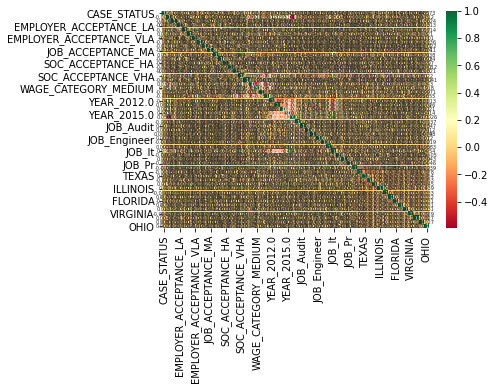

In [41]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":5})

In [ ]:
df.to_csv('visawise.csv')